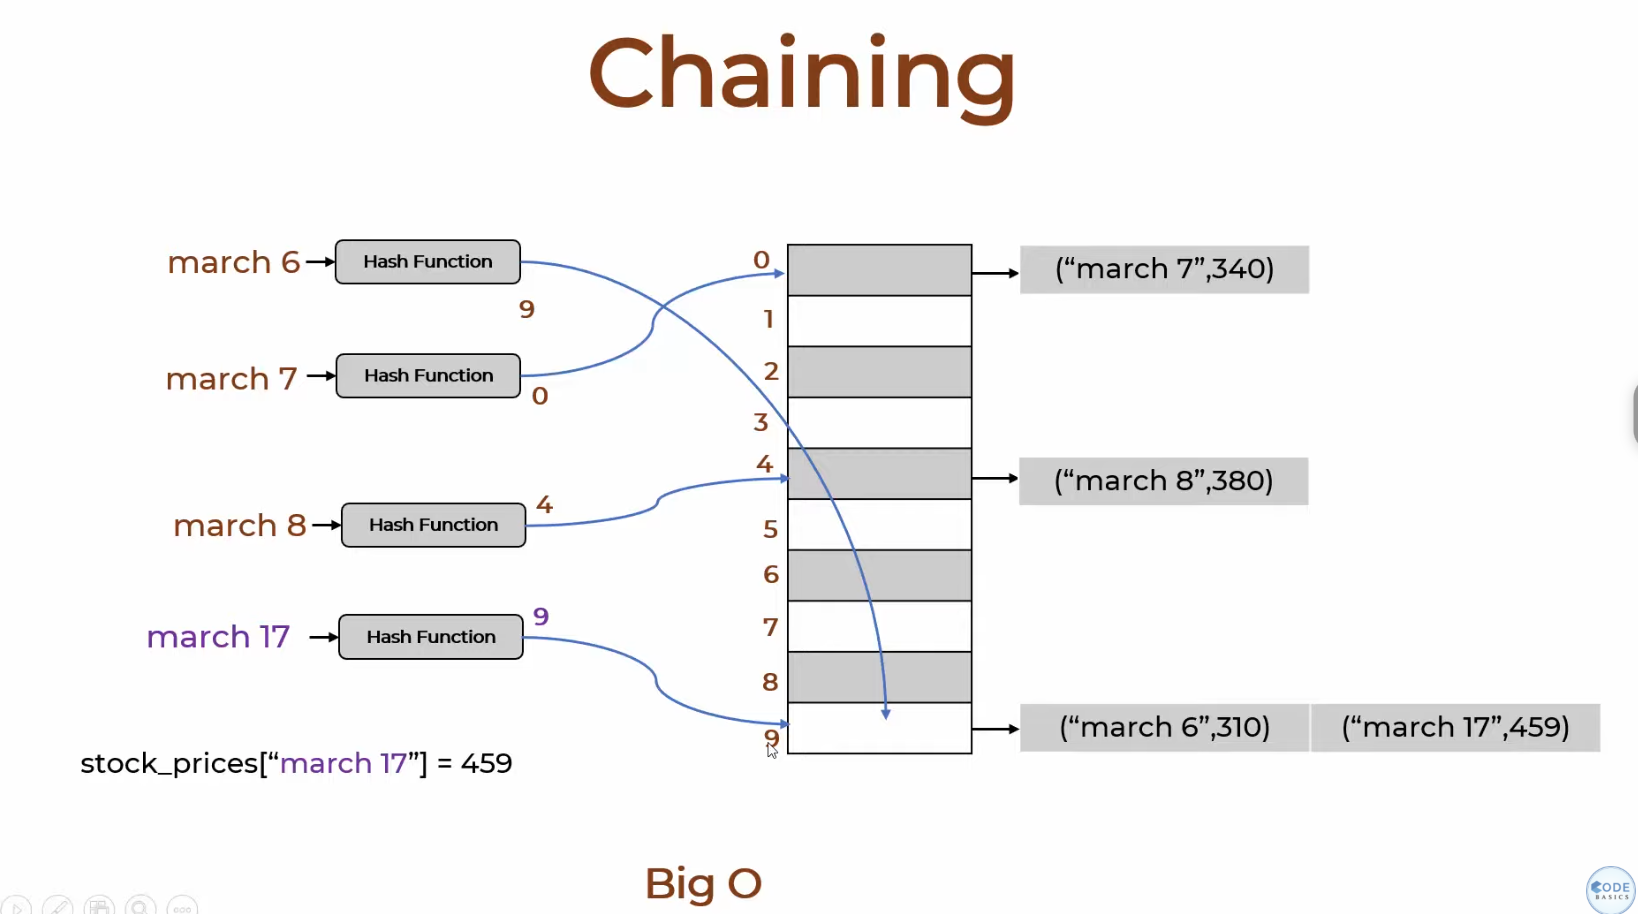
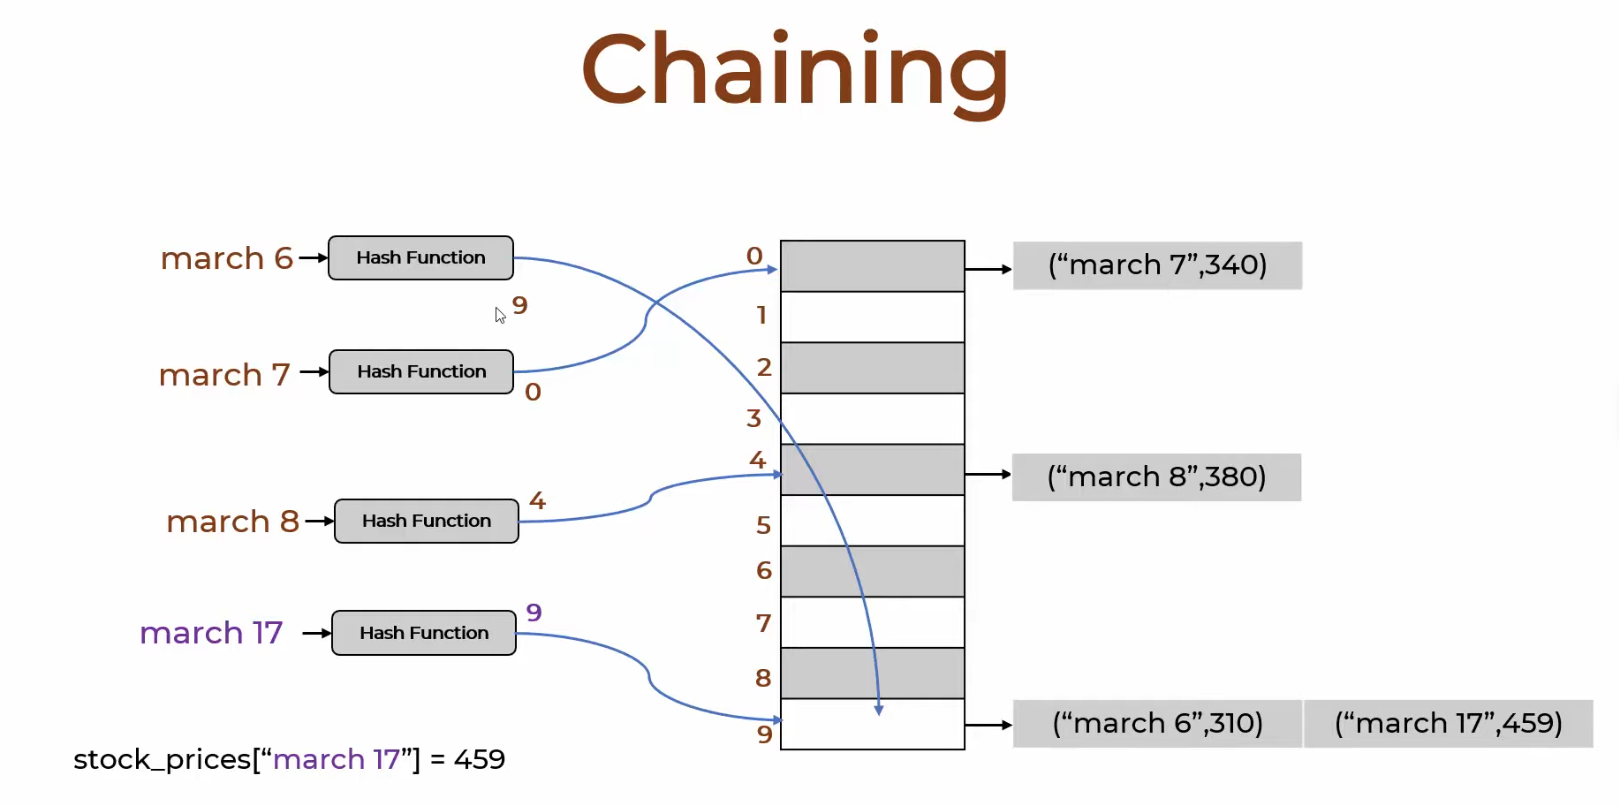

When get a collisiion which means for some other keys march 6 and march 17 same index. I need to do some special handling because now two keys are trying to store theirs values at the same location. Here we can use an approach called separate chaining or chaining where instead of directly storing the value we store a linked list or a list at every location.

So first when march 6 came in, we appended this element into a linked list. Next time when we have a collision and second elements comes in, we just append it to that particular linked list.

This linked list can keep on growing and multiple keys can share the same hash value. The big O analysis here will be O(n)

When you want to return value of March 17, you first use hash function to get an index which is 9. You go to index number nine then you linearly search this linked list and for  that reason it is important to have your key stored in each or these elements so that you know which value is associated with which key.



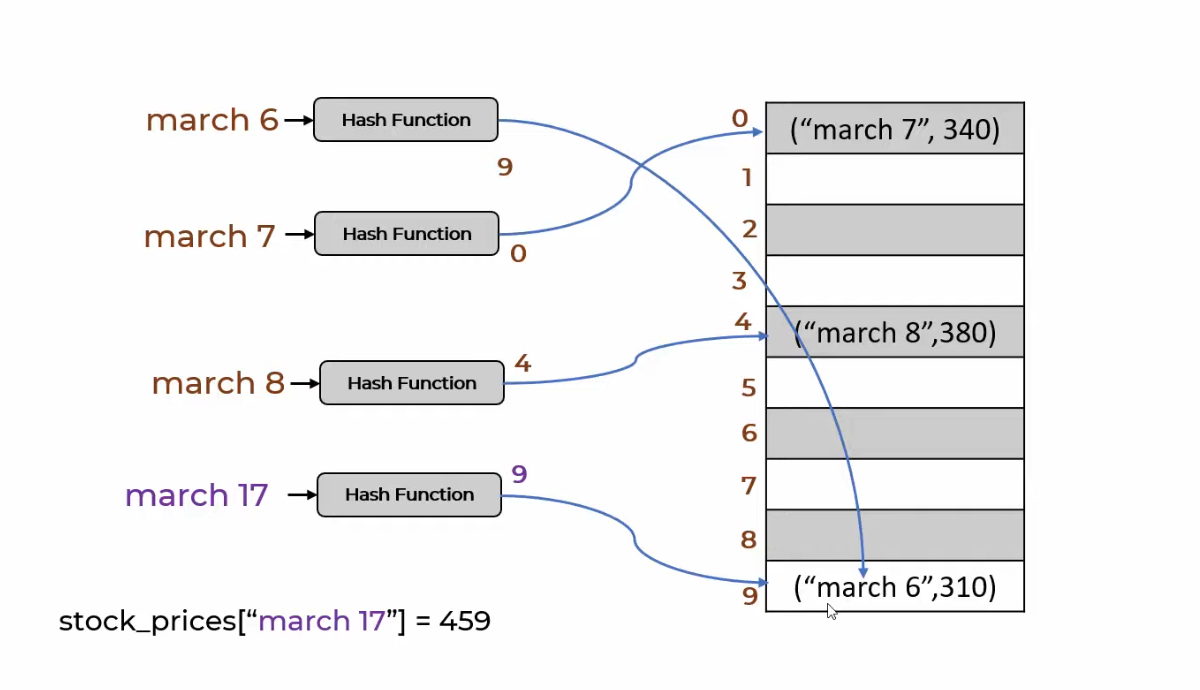

The second approach for solving the collision is called linear probing. What we do is then for march 17 we get in index 9 and we find that there is already a value store at this location. we go to the next vailable location. Here my array is ending here but lets say if there was a 10th location which was empty then I would store March 17 at 10th location. But I don't have that location, I will go reverse look at 0th location. That location is also filled out so then I go to location number one and here I store my March 17. 

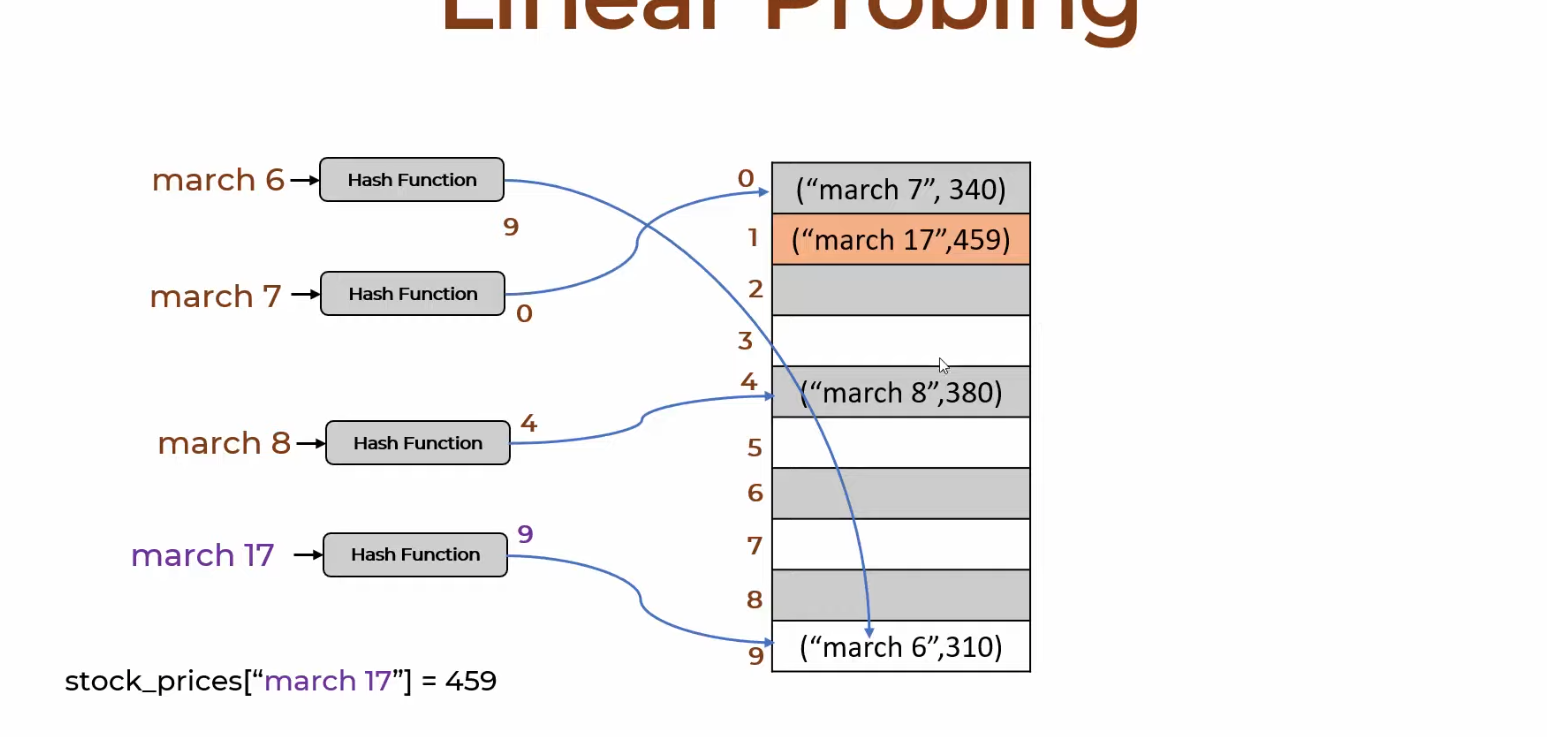

It is called Linear probing because linearly probing means searching for an empty slot to stroe my key values.

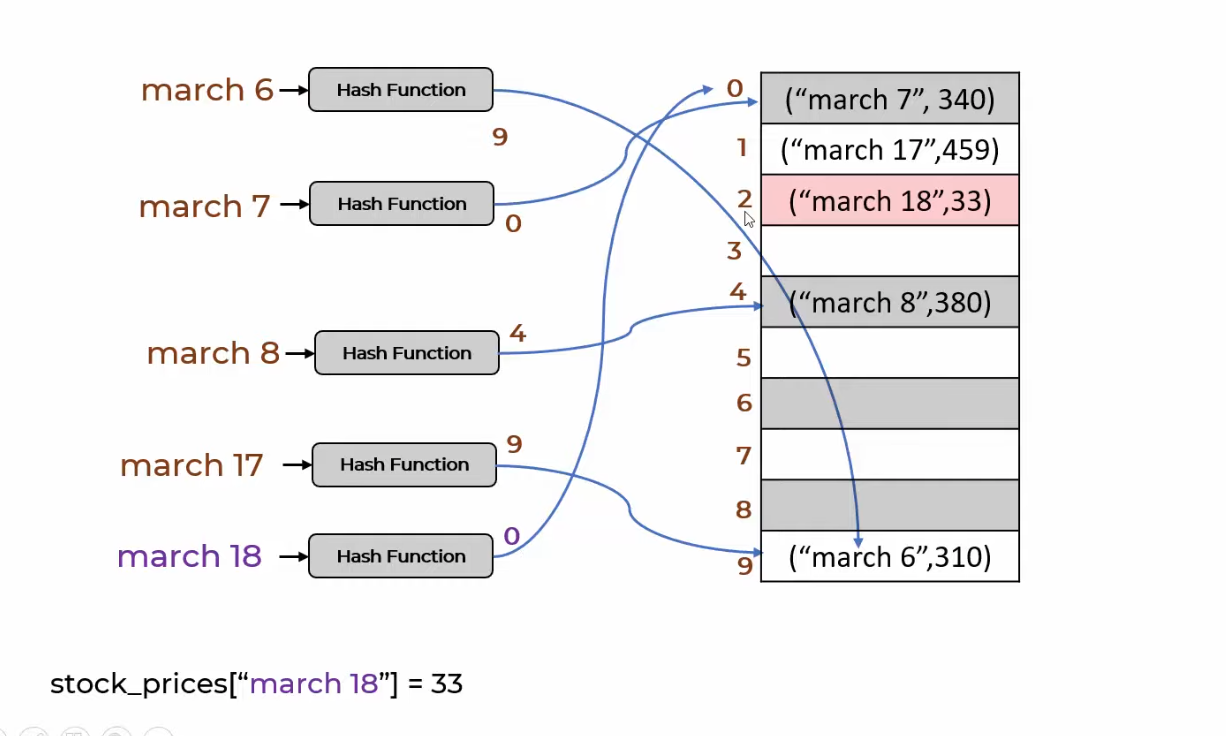

In [87]:
class HashTable:
    def __init__(self):
        self.MAX = 10
        self.arr = [None for i in range(self.MAX)]
        
    def get_hash(self,key):
        hash = 0
        for char in key:
            hash += ord(char)
        return hash % self.MAX
    
    def __getitem__(self, index):
        h = self.get_hash(index)
        return self.arr[h]
    
    def __setitem__(self, key, val):
        h = self.get_hash(key)
        self.arr[h] = val

In [88]:
t = HashTable()
t.get_hash("march 6")

9

In [89]:
t.get_hash("march 17")

9

In [90]:
t["march 6"] = 120
t["march 8"] = 67
t["march 9"] = 4
t["march 17"] = 459

Because march 17 has same index march 6, it would have over returned the value for march 6. Hence when I say get me a value of march 6, I am getting 459.

In [91]:
t["march 6"]

459

# Collision Handling

Instead of initializing none as individual element, I will initialize empty array because now the each element is not just the value. We are storing key value pair. We store key value pair whenever we have collision so that we can look at the right element.

In [92]:
class HashTable:
    def __init__(self):
        self.MAX = 10
        self.arr = [[] for i in range(self.MAX)] # initialize empty array 
        
    def get_hash(self,key):
        hash = 0
        for char in key:
            hash += ord(char)
        return hash % self.MAX
    
    def __getitem__(self, key):
        h = self.get_hash(key)
        for element in self.arr[h]:
            if element[0] == key:
                return element[1]
    
    def __setitem__(self, key, val):
        h = self.get_hash(key)
        found = False
        for idx, element in enumerate(self.arr[h]):
            if len(element) == 2 and element[0]==key:
                self.arr[h][idx] = (key,val)
                found =True
                break
        if not found:
            self.arr[h].append((key,val))
    
    def __delitem__(self, key):
        h = self.get_hash(key)
        # Iterate through the elements in the list at position h of the self.arr array.
        for index, element in enumerate(self.arr[h]):
            if element[0] == key:
                del self.arr[h][index]

In [93]:
t = HashTable()

In [94]:
t["march 6"] = 120
t["march 6"] = 78
t["march 8"] = 67
t["march 9"] = 4
t["march 17"] = 459

In [95]:
t["march 6"]

78

In [96]:
t["march 17"]

459

In [97]:
t.arr

[[],
 [('march 8', 67)],
 [('march 9', 4)],
 [],
 [],
 [],
 [],
 [],
 [],
 [('march 6', 78), ('march 17', 459)]]

In [98]:
del t["march 17"]

In [99]:
t.arr

[[],
 [('march 8', 67)],
 [('march 9', 4)],
 [],
 [],
 [],
 [],
 [],
 [],
 [('march 6', 78)]]

In [100]:
del t["march 6"]

In [101]:
t.arr

[[], [('march 8', 67)], [('march 9', 4)], [], [], [], [], [], [], []]

# Exercise

(1) nyc_weather.csv contains new york city weather for first few days in the month of January. Write a program that can answer following,

  (a) What was the average temperature in first week of Jan

  (b) What was the maximum temperature in first 10 days of Jan

  Figure out data structure that is best for this problem

In [102]:
arr = []

with open("./NYC Weather Data.csv","r") as f:
    for line in f:
        tokens = line.split(',')
        try:
            temperature = int(tokens[1])
            arr.append(temperature)
        except:
            print("Invalid temperature.Ignore the row")

Invalid temperature.Ignore the row


In [103]:
arr

[27, 31, 23, 34, 37, 38, 29, 30, 35, 30]

**What was the average temperature in first week of Jan**

In [104]:
sum(arr[0:7])/len(arr[0:7])

31.285714285714285

**What was the maximum temperature in first 10 days of Jan**

In [105]:
arr[0:10]

[27, 31, 23, 34, 37, 38, 29, 30, 35, 30]

In [106]:
max(arr[0:10])

38

(2) nyc_weather.csv contains new york city weather for first few days in the month of January. Write a program that can answer following,

  (a) What was the temperature on Jan 9?

  (b) What was the temperature on Jan 4?

  Figure out data structure that is best for this problem

In [107]:
weather_dict = {}

with open("./NYC Weather Data.csv","r") as f:
    for line in f:
        tokens = line.split(',')
        day = tokens[0]
        try:
            temperature = int(tokens[1])
            weather_dict[day] = temperature
        except:
            print("Invalid temperature.Ignore the row")

Invalid temperature.Ignore the row


In [108]:
weather_dict

{'Jan 1': 27,
 'Jan 2': 31,
 'Jan 3': 23,
 'Jan 4': 34,
 'Jan 5': 37,
 'Jan 6': 38,
 'Jan 7': 29,
 'Jan 8': 30,
 'Jan 9': 35,
 'Jan 10': 30}

**What was the temperature on Jan 9**

In [109]:
weather_dict['Jan 9']

35

**What was the temperature on Jan 4**

3. poem.txt Contains famous poem "Road not taken" by poet Robert Frost. You have to read this file in python and print every word and its count as show below. Think about the best data structure that you can use to solve this problem and figure out why you selected that specific data structure.
```
 'diverged': 2,
 'in': 3,
 'I': 8
```

In [110]:
with open ("HashTable Collisions Poem.txt", "r") as f:
    for line in f:
        print(line)

Two roads diverged in a yellow wood,

And sorry I could not travel both

And be one traveler, long I stood

And looked down one as far as I could

To where it bent in the undergrowth;



Then took the other, as just as fair,

And having perhaps the better claim,

Because it was grassy and wanted wear;

Though as for that the passing there

Had worn them really about the same,



And both that morning equally lay

In leaves no step had trodden black.

Oh, I kept the first for another day!

Yet knowing how way leads on to way,

I doubted if I should ever come back.



I shall be telling this with a sigh

Somewhere ages and ages hence:

Two roads diverged in a wood, and I—

I took the one less traveled by,

And that has made all the difference.


In [111]:
world_count = {}
with open ("HashTable Collisions Poem.txt", "r") as f:
    for line in f:
        tokens = line.split(' ')
        for token in tokens:
            token=token.replace('\n', '')
            if token in world_count:
                world_count[token]+=1
            else:
                world_count[token]=1

In [112]:
world_count

{'Two': 2,
 'roads': 2,
 'diverged': 2,
 'in': 3,
 'a': 3,
 'yellow': 1,
 'wood,': 2,
 'And': 6,
 'sorry': 1,
 'I': 8,
 'could': 2,
 'not': 1,
 'travel': 1,
 'both': 2,
 'be': 2,
 'one': 3,
 'traveler,': 1,
 'long': 1,
 'stood': 1,
 'looked': 1,
 'down': 1,
 'as': 5,
 'far': 1,
 'To': 1,
 'where': 1,
 'it': 2,
 'bent': 1,
 'the': 8,
 'undergrowth;': 1,
 '': 3,
 'Then': 1,
 'took': 2,
 'other,': 1,
 'just': 1,
 'fair,': 1,
 'having': 1,
 'perhaps': 1,
 'better': 1,
 'claim,': 1,
 'Because': 1,
 'was': 1,
 'grassy': 1,
 'and': 3,
 'wanted': 1,
 'wear;': 1,
 'Though': 1,
 'for': 2,
 'that': 3,
 'passing': 1,
 'there': 1,
 'Had': 1,
 'worn': 1,
 'them': 1,
 'really': 1,
 'about': 1,
 'same,': 1,
 'morning': 1,
 'equally': 1,
 'lay': 1,
 'In': 1,
 'leaves': 1,
 'no': 1,
 'step': 1,
 'had': 1,
 'trodden': 1,
 'black.': 1,
 'Oh,': 1,
 'kept': 1,
 'first': 1,
 'another': 1,
 'day!': 1,
 'Yet': 1,
 'knowing': 1,
 'how': 1,
 'way': 1,
 'leads': 1,
 'on': 1,
 'to': 1,
 'way,': 1,
 'doubted': 1,
 

Implement hash table where collisions are handled using linear probing. We learnt about linear probing in the video tutorial. Take the hash table implementation that uses chaining and modify methods to use **linear probing**. Keep MAX size of arr in hashtable as 10.

In [113]:
class HashTable:  
    def __init__(self):
        self.MAX = 10 # I am keeping size very low to demonstrate linear probing easily but usually the size should be high
        self.arr = [None for i in range(self.MAX)]
        
    def get_hash(self, key):
        hash = 0
        for char in key:
            hash += ord(char)
        return hash % self.MAX
    
    def __getitem__(self, key):
        h = self.get_hash(key)
        if self.arr[h] is None:
            return
        prob_range = self.get_prob_range(h)
        for prob_index in prob_range:
            element = self.arr[prob_index]
            if element is None:
                return
            if element[0] == key:
                return element[1]
           
    def __setitem__(self, key, val):
        h = self.get_hash(key)
        if self.arr[h] is None:
            self.arr[h] = (key,val)
        else:
            new_h = self.find_slot(key, h)
            self.arr[new_h] = (key,val)
        print(self.arr)
        
    def get_prob_range(self, index):
        return [*range(index, len(self.arr))] + [*range(0,index)]
    
    def find_slot(self, key, index):
        prob_range = self.get_prob_range(index)
        for prob_index in prob_range:
            if self.arr[prob_index] is None:
                return prob_index
            if self.arr[prob_index][0] == key:
                return prob_index
    
    def __delitem__(self, key):
        h = self.get_hash(key)
        prob_range = self.get_prob_range(h)
        for prob_index in prob_range:
            if self.arr[prob_index] is None:
                return # item not found so return. You can also throw exception
            if self.arr[prob_index][0] == key:
                self.arr[prob_index]=None
        print(self.arr)

Function to show how *range(x,y) works. It returns a list of numbers in range(x,y)

In [114]:
[*range(5,8)] + [*range(0,4)]

[5, 6, 7, 0, 1, 2, 3]

In [115]:
t = HashTable()
t["march 6"] = 20
t["march 17"] =  88

[None, None, None, None, None, None, None, None, None, ('march 6', 20)]
[('march 17', 88), None, None, None, None, None, None, None, None, ('march 6', 20)]


In [116]:
t["march 17"] = 29

[('march 17', 29), None, None, None, None, None, None, None, None, ('march 6', 20)]


In [117]:
t["march 17"]

29

In [118]:
t["nov 1"] = 1

[('march 17', 29), ('nov 1', 1), None, None, None, None, None, None, None, ('march 6', 20)]


In [119]:
t["march 33"]=234

[('march 17', 29), ('nov 1', 1), None, None, None, None, None, ('march 33', 234), None, ('march 6', 20)]


In [120]:
t["march 33"]

234

In [121]:
t["march 33"] = 999

[('march 17', 29), ('nov 1', 1), None, None, None, None, None, ('march 33', 999), None, ('march 6', 20)]


In [122]:
t["march 33"]

999

In [123]:
del t["nov 1"]

In [124]:
t.arr

[('march 17', 29),
 None,
 None,
 None,
 None,
 None,
 None,
 ('march 33', 999),
 None,
 ('march 6', 20)]